In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd

weather = pd.read_csv("WO1.csv", index_col="DATE")

Saving WO1.csv to WO1.csv


In [ ]:
weather.apply(pd.isnull).sum()/weather.shape[0]

,0
STATION,0.000000
NAME,0.000000
ACMH,0.672788
ACSH,0.672788
AWND,0.493225
DAPR,0.999552
FMTM,0.877380
FRGT,0.999888
MDPR,0.999552
PGTM,0.523124


In [ ]:
core_weather = weather[["PRCP", "TMAX", "TMIN"]].copy()
core_weather.columns = ["precip", "temp_max", "temp_min"]

In [ ]:
core_weather.apply(pd.isnull).sum()

,0
precip,284
temp_max,11
temp_min,14


In [ ]:
core_weather[pd.isnull(core_weather["precip"])]

,precip,temp_max,temp_min
DATE,,,
1983-10-29,NaN,67.0,57.0
1983-10-30,NaN,70.0,63.0
1983-10-31,NaN,69.0,61.0
1983-11-12,NaN,63.0,55.0
1983-11-13,NaN,60.0,50.0
...,...,...,...
2016-05-08,NaN,67.0,56.0
2017-10-28,NaN,68.0,50.0
2023-03-29,NaN,52.0,43.0


In [ ]:
core_weather.loc["2013-12-15",:]

,2013-12-15
precip,NaN
temp_max,58.0
temp_min,33.0


In [ ]:
core_weather["precip"].value_counts() / core_weather.shape[0]

,count
precip,
0.00,0.813046
0.01,0.024916
0.02,0.011478
0.03,0.007055
0.04,0.005935
...,...
1.38,0.000056
1.95,0.000056
2.01,0.000056


In [ ]:
core_weather["precip"] = core_weather["precip"].fillna(0)

In [ ]:
core_weather.apply(pd.isnull).sum()

,0
precip,0
temp_max,11
temp_min,14


In [ ]:
core_weather[pd.isnull(core_weather["temp_min"])]

,precip,temp_max,temp_min
DATE,,,
2004-11-20,0.0,NaN,NaN
2011-12-21,0.0,61.0,NaN
2011-12-22,0.0,62.0,NaN
2011-12-23,0.0,56.0,NaN
2011-12-24,0.0,55.0,NaN
2011-12-25,0.0,54.0,NaN
2013-06-16,0.0,NaN,NaN
2020-08-29,0.0,NaN,NaN
2020-09-08,0.0,NaN,NaN


In [ ]:
core_weather.loc["2011-12-18":"2011-12-28"]

,precip,temp_max,temp_min
DATE,,,
2011-12-18,0.0,52.0,33.0
2011-12-19,0.0,55.0,35.0
2011-12-20,0.0,61.0,35.0
2011-12-21,0.0,61.0,NaN
2011-12-22,0.0,62.0,NaN
2011-12-23,0.0,56.0,NaN
2011-12-24,0.0,55.0,NaN
2011-12-25,0.0,54.0,NaN
2011-12-26,0.0,50.0,32.0


In [ ]:
core_weather = core_weather.fillna(method="ffill")

<ipython-input-37-3155be3e20b8>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  core_weather = core_weather.fillna(method="ffill")


In [ ]:
core_weather.apply(pd.isnull).sum()

,0
precip,0
temp_max,0
temp_min,0


In [ ]:
# Check for missing value defined in data documentation
core_weather.apply(lambda x: (x == 9999).sum())

,0
precip,0
temp_max,0
temp_min,0


In [ ]:
core_weather.dtypes

,0
precip,float64
temp_max,float64
temp_min,float64


In [ ]:
core_weather.index

Index(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04', '1960-01-05',
       '1960-01-06', '1960-01-07', '1960-01-08', '1960-01-09', '1960-01-10',
       ...
       '2024-10-15', '2024-10-16', '2024-10-17', '2024-10-18', '2024-10-19',
       '2024-10-20', '2024-10-21', '2024-10-22', '2024-10-23', '2024-10-24'],
      dtype='object', name='DATE', length=17860)

In [ ]:
core_weather.index = pd.to_datetime(core_weather.index)

In [ ]:
core_weather.index

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2024-10-15', '2024-10-16', '2024-10-17', '2024-10-18',
               '2024-10-19', '2024-10-20', '2024-10-21', '2024-10-22',
               '2024-10-23', '2024-10-24'],
              dtype='datetime64[ns]', name='DATE', length=17860, freq=None)

In [ ]:
core_weather.index.year

Index([1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960,
       ...
       2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024],
      dtype='int32', name='DATE', length=17860)

<Axes: xlabel='DATE'>

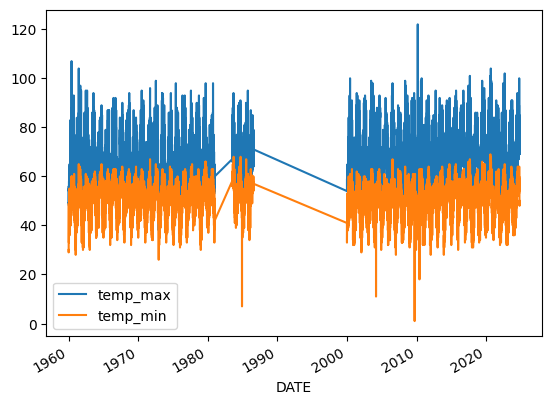

In [ ]:
core_weather[["temp_max", "temp_min"]].plot()

In [ ]:
core_weather.index.year.value_counts().sort_index()

,count
DATE,
1960,366
1961,365
1962,365
1963,365
1964,366
1965,365
1966,365
1967,365
1968,366


<Axes: xlabel='DATE'>

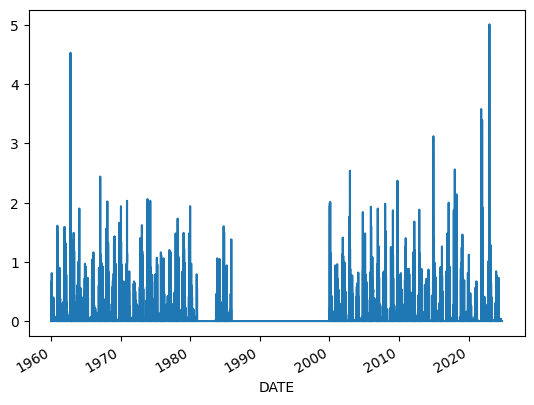

In [ ]:
core_weather["precip"].plot()

<Axes: xlabel='DATE'>

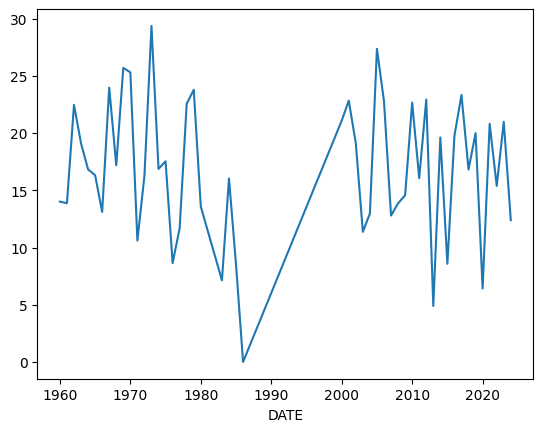

In [ ]:
core_weather.groupby(core_weather.index.year).apply(lambda x: x["precip"].sum()).plot()

In [ ]:
core_weather["target"] = core_weather.shift(-1)["temp_max"]

In [ ]:
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2024-10-20,0.0,79.0,48.0,70.0
2024-10-21,0.0,70.0,50.0,69.0
2024-10-22,0.0,69.0,51.0,75.0


In [ ]:
core_weather = core_weather.iloc[:-1,:].copy()

In [ ]:
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2024-10-19,0.0,85.0,51.0,79.0
2024-10-20,0.0,79.0,48.0,70.0
2024-10-21,0.0,70.0,50.0,69.0


In [ ]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)

In [ ]:
predictors = ["precip", "temp_max", "temp_min"]

In [ ]:
train = core_weather.loc[:"2020-12-31"]
test = core_weather.loc["2021-01-01":]

In [ ]:
train

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.00,49.0,30.0,49.0
1960-01-02,0.00,49.0,29.0,54.0
1960-01-03,0.00,54.0,35.0,54.0
1960-01-04,0.00,54.0,36.0,55.0
1960-01-05,0.00,55.0,33.0,53.0
...,...,...,...,...
2020-12-27,0.00,63.0,44.0,61.0
2020-12-28,0.10,61.0,42.0,60.0
2020-12-29,0.00,60.0,39.0,56.0


In [ ]:
test

,precip,temp_max,temp_min,target
DATE,,,,
2021-01-01,0.00,60.0,40.0,57.0
2021-01-02,0.14,57.0,51.0,56.0
2021-01-03,0.00,56.0,49.0,62.0
2021-01-04,0.36,62.0,46.0,59.0
2021-01-05,0.00,59.0,42.0,59.0
...,...,...,...,...
2024-10-19,0.00,85.0,51.0,79.0
2024-10-20,0.00,79.0,48.0,70.0
2024-10-21,0.00,70.0,50.0,69.0


In [ ]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [ ]:
predictions = reg.predict(test[predictors])

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(test["target"], predictions)

21.510515942113592

In [ ]:
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual", "predictions"]

In [ ]:
combined

,actual,predictions
DATE,,
2021-01-01,57.0,59.806024
2021-01-02,56.0,59.310181
2021-01-03,62.0,58.538685
2021-01-04,59.0,61.531814
2021-01-05,59.0,59.444266
...,...,...
2024-10-19,79.0,79.811078
2024-10-20,70.0,74.945176
2024-10-21,69.0,68.814312


<Axes: xlabel='DATE'>

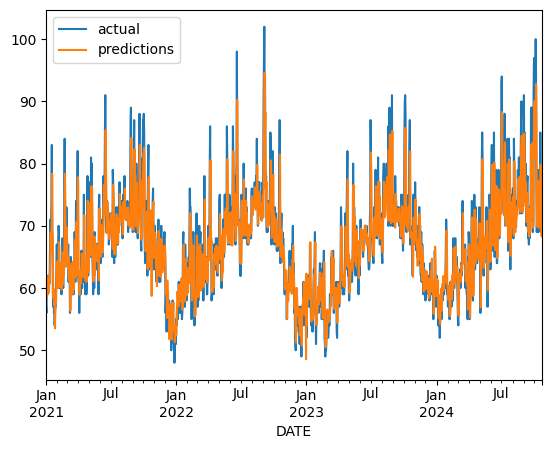

In [ ]:
combined.plot()

In [ ]:
reg.coef_

array([-2.20730384,  0.72113834,  0.17969047])

In [ ]:
core_weather["month_max"] = core_weather["temp_max"].rolling(30).mean()

core_weather["month_day_max"] = core_weather["month_max"] / core_weather["temp_max"]

core_weather["max_min"] = core_weather["temp_max"] / core_weather["temp_min"]

In [ ]:
core_weather = core_weather.iloc[30:,:].copy()

In [67]:
def create_predictions(predictors, core_weather, reg):
    train = core_weather.loc[:"2020-12-31"]
    test = core_weather.loc["2021-01-01":]

    reg.fit(train[predictors], train["target"])
    predictions = reg.predict(test[predictors])

    error = mean_squared_error(test["target"], predictions)

    combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ["actual", "predictions"]
    return error, combined

In [68]:
predictors = ["precip", "temp_max", "temp_min", "month_day_max", "max_min"]

error, combined = create_predictions(predictors, core_weather, reg)
error

20.743046911711644

<Axes: xlabel='DATE'>

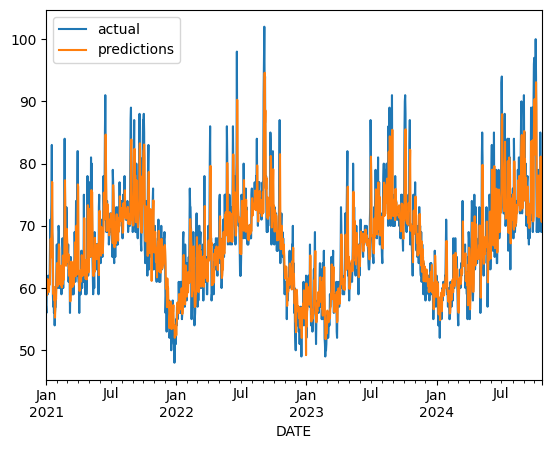

In [69]:
combined.plot()

In [75]:
reg.coef_

array([-1.77461637,  0.83458209,  0.12364865, 13.16806715,  0.14239278])

In [76]:
core_weather.corr()["target"]

,target
precip,-0.206147
temp_max,0.822294
temp_min,0.597515
target,1.000000
month_max,0.689861
month_day_max,-0.419923
max_min,0.045249
monthly_avg,0.691750


In [77]:
combined["diff"] = (combined["actual"] - combined["predictions"]).abs()

In [79]:
combined.sort_values("diff", ascending=False).head(10)

,actual,predictions,diff
DATE,,,
2022-06-20,98.0,76.671927,21.328073
2024-09-29,90.0,71.486586,18.513414
2024-07-01,93.0,75.803037,17.196963
2022-05-23,86.0,69.396816,16.603184
2024-06-10,85.0,68.646844,16.353156
2024-09-26,89.0,72.970365,16.029635
2024-09-02,91.0,75.072774,15.927226
2023-06-30,87.0,71.136650,15.863350
2023-08-29,91.0,75.351535,15.648465
